<a href="https://colab.research.google.com/github/baeksumin/k-project/blob/main/K_project_hyunku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
1. 저장된 fullcode 목록을 불러와서 종목별 데이터 수집
2. pickle 저장

(프로젝트를 시작할 때 1번만 실행)
'''

'\n1. 저장된 fullcode 목록을 불러와서 종목별 데이터 수집\n2. pickle 저장\n\n(프로젝트를 시작할 때 1번만 실행)\n'

In [ ]:
import json
import requests
import pandas as pd
from io import BytesIO
from datetime import datetime 
from datetime import timedelta
import pickle
from google.colab import drive

drive.mount('/content/drive')
output_path = '/content/drive/MyDrive/k-project/output/'
data_path = '/content/drive/MyDrive/[Shared]K-Project/'
# pickle 경로를 설정하기 위해

Mounted at /content/drive


In [ ]:
# 한국시간 설정
import pytz

KST = pytz.timezone('Asia/Seoul')
today = str(datetime.now(KST).strftime("%Y%m%d"))
print(today)

20211005


In [108]:
## Load pickle - fullcode 목록
with open(data_path + 'full_code.pkl',"rb") as f: 
    fullcode = pickle.load(f)
fullcode

,full_code,short_code,codeName,marketEngName,status
0,KR7060310000,060310,3S,KOSDAQ,상장
1,KR7095570008,095570,AJ네트웍스,KOSPI,상장
2,KR7006840003,006840,AK홀딩스,KOSPI,상장
3,KR7054620000,054620,APS홀딩스,KOSDAQ,상장
4,KR7265520007,265520,AP시스템,KOSDAQ,상장
...,...,...,...,...,...
2580,KR7000542001,000547,흥국화재2우B,KOSPI,상장
2581,KR7000541003,000545,흥국화재우,KOSPI,상장
2582,KR7003280005,003280,흥아해운,KOSPI,상장
2583,KR7037440005,037440,희림,KOSDAQ,상장


In [109]:
#상장폐지 상태 제외시키기.
fullcode_filter = fullcode[fullcode['status'] != '상장폐지']
fullcode_filter

,full_code,short_code,codeName,marketEngName,status
0,KR7060310000,060310,3S,KOSDAQ,상장
1,KR7095570008,095570,AJ네트웍스,KOSPI,상장
2,KR7006840003,006840,AK홀딩스,KOSPI,상장
3,KR7054620000,054620,APS홀딩스,KOSDAQ,상장
4,KR7265520007,265520,AP시스템,KOSDAQ,상장
...,...,...,...,...,...
2580,KR7000542001,000547,흥국화재2우B,KOSPI,상장
2581,KR7000541003,000545,흥국화재우,KOSPI,상장
2582,KR7003280005,003280,흥아해운,KOSPI,상장
2583,KR7037440005,037440,희림,KOSDAQ,상장


In [110]:
fullcode_list = list(fullcode_filter['full_code'])
print(fullcode_list[:10])
# fullcode열을 list로 변경 후 확인

['KR7060310000', 'KR7095570008', 'KR7006840003', 'KR7054620000', 'KR7265520007', 'KR7211270004', 'KR7027410000', 'KR7282330000', 'KR7138930003', 'KR7001460005']


In [111]:
'''
종가 시가 저가 고가 시가총액 EPS PER BPS PBR 주당배당금 배당수익률
(* 필요한 컬럼)

df2
 0   TRD_DD : 거래일자 *
 1   ISU_CD : 종목코드 *      
 2   ISU_NM : 종목명 *      
 3   MKT_NM : 시장코드 (kospi)      
 4   SECUGRP_NM : 증권구분 (주권)    
 5   TDD_CLSPRC : 종가 *  
 6   FLUC_TP_CD    
 7   CMPPRVDD_PRC : 대비 
 8   FLUC_RT : 등락률      
 9   TDD_OPNPRC : 시가 *  
 10  TDD_HGPRC  : 고가 *  
 11  TDD_LWPRC  : 저가 *  
 12  ACC_TRDVOL : 거래량   
 13  ACC_TRDVAL : 거래대금   
 14  MKTCAP : 시가총액 *

df3
 0   TRD_DD : 거래일자        
 1   TDD_CLSPRC : 종가    
 2   FLUC_TP_CD     
 3   CMPPREVDD_PRC : 대비 
 4   FLUC_RT : 등락률      
 5   EPS *           
 6   PER *           
 7   BPS *           
 8   PBR *           
 9   DPS : 주당배당금 *          
 10  DVD_YLD : 배당수익률 *
 '''

'\n종가 시가 저가 고가 시가총액 EPS PER BPS PBR 주당배당금 배당수익률\n(* 필요한 컬럼)\n\ndf2\n 0   TRD_DD : 거래일자 *\n 1   ISU_CD : 종목코드 *      \n 2   ISU_NM : 종목명 *      \n 3   MKT_NM : 시장코드 (kospi)      \n 4   SECUGRP_NM : 증권구분 (주권)    \n 5   TDD_CLSPRC : 종가 *  \n 6   FLUC_TP_CD    \n 7   CMPPRVDD_PRC : 대비 \n 8   FLUC_RT : 등락률      \n 9   TDD_OPNPRC : 시가 *  \n 10  TDD_HGPRC  : 고가 *  \n 11  TDD_LWPRC  : 저가 *  \n 12  ACC_TRDVOL : 거래량   \n 13  ACC_TRDVAL : 거래대금   \n 14  MKTCAP : 시가총액 *\n\ndf3\n 0   TRD_DD : 거래일자        \n 1   TDD_CLSPRC : 종가    \n 2   FLUC_TP_CD     \n 3   CMPPREVDD_PRC : 대비 \n 4   FLUC_RT : 등락률      \n 5   EPS *           \n 6   PER *           \n 7   BPS *           \n 8   PBR *           \n 9   DPS : 주당배당금 *          \n 10  DVD_YLD : 배당수익률 *\n '

In [112]:
url2 = 'http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd'
headers = {'User-Agent': 'Chrome/78.0.3904.87 Safari/537.36',}

strtDd = '19000101'
endDd = today

for i in fullcode_list[:2]: # 테스트를 위해 2개만 실행 (두 종목만 출력됨)
    data2 = { 'bld': 'dbms/MDC/STAT/issue/MDCSTAT23902',
    'isuCd': i,
    'isuCd2': '',
    'strtDd': strtDd,
    'endDd': endDd,
    'share': '1',
    'money': '1',
    'csvxls_isNo': 'false',}

    r2 = requests.post(url2, data2, headers)
    j2 = json.loads(r2.text)
    df2=pd.DataFrame(j2['output'])
    # print(df2)
    # print('------------------------------------------------')

    data3 = { 'bld': 'dbms/MDC/STAT/standard/MDCSTAT03502',
    'isuCd': i,
    'isuCd2': i,
    'strtDd': strtDd,
    'endDd': endDd,
    'searchType': '2',
    'mktId': 'ALL',
    'csvxls_isNo': 'false',}

    r2 = requests.post(url2, data3, headers)
    j2 = json.loads(r2.text)
    df3=pd.DataFrame(j2['output'])
    # print(df3)
    # print('------------------------------------------------')

    df2_ = df2[['TRD_DD', 'ISU_CD', 'ISU_NM', 'TDD_CLSPRC', 'TDD_OPNPRC', 'TDD_HGPRC', 'TDD_LWPRC', 'MKTCAP']]
    df3_ = df3[['TRD_DD', 'EPS', 'PER', 'BPS', 'PBR', 'DPS', 'DVD_YLD']]

    result = pd.merge(df2_, df3_)
    print(result)
    print('------------------------------------------------')

          TRD_DD  ISU_CD  ISU_NM TDD_CLSPRC  ...  BPS   PBR DPS DVD_YLD
0     2021/10/05  060310      3S      3,825  ...  792  4.83   0    0.00
1     2021/10/01  060310      3S      3,960  ...  792  5.00   0    0.00
2     2021/09/30  060310      3S      4,105  ...  792  5.18   0    0.00
3     2021/09/29  060310      3S      4,160  ...  792  5.25   0    0.00
4     2021/09/28  060310      3S      3,985  ...  792  5.03   0    0.00
...          ...     ...     ...        ...  ...  ...   ...  ..     ...
4805  2002/04/29  060310  삼에스코리아      6,780  ...    -     -   -       -
4806  2002/04/26  060310  삼에스코리아      7,700  ...    -     -   -       -
4807  2002/04/25  060310  삼에스코리아      8,750  ...    -     -   -       -
4808  2002/04/24  060310  삼에스코리아      8,510  ...    -     -   -       -
4809  2002/04/23  060310  삼에스코리아      7,600  ...    -     -   -       -

[4810 rows x 14 columns]
------------------------------------------------
          TRD_DD  ISU_CD  ISU_NM TDD_CLSPRC  ...     BPS   PB

In [113]:
## Save pickle
# with open(output_path + "df2.pickle","wb") as fw:
#     pickle.dump(df2, fw)

In [ ]:
#talib 설치
!wget -q http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 2>&1 > /dev/null
!tar xvzf ta-lib-0.4.0-src.tar.gz 2>&1 > /dev/null

import os

os.chdir('ta-lib')  

!./configure --prefix=/usr 2>&1 > /dev/null
!make 2>&1 > /dev/null
!make install 2>&1 > /dev/null

os.chdir('../')

!pip install TA-Lib 2>&1 > /dev/null

./configure: line 4354: /usr/bin/file: No such file or directory
libtool: link: warning: `-version-info/-version-number' is ignored for convenience libraries
ar: `u' modifier ignored since `D' is the default (see `U')
libtool: link: warning: `-version-info/-version-number' is ignored for convenience libraries
ar: `u' modifier ignored since `D' is the default (see `U')
libtool: link: warning: `-version-info/-version-number' is ignored for convenience libraries
ar: `u' modifier ignored since `D' is the default (see `U')
libtool: link: warning: `-version-info/-version-number' is ignored for convenience libraries
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
gen_code.c: In function ‘printFuncHeaderDoc’:
gen_code.c:3456:4: warning: format not a string literal and no format arguments [-Wformat-security]
    fprintf( out, prefix );
    ^~~~~~~


In [ ]:
import talib
import numpy as np

In [114]:
result

,TRD_DD,ISU_CD,ISU_NM,TDD_CLSPRC,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,MKTCAP,EPS,PER,BPS,PBR,DPS,DVD_YLD
0,2021/10/05,095570,AJ네트웍스,"5,470","5,710","5,760","5,400","256,117,953,650",-,-,"6,089",0.90,210,3.85
1,2021/10/01,095570,AJ네트웍스,"5,770","5,830","5,890","5,680","270,164,642,150",-,-,"6,089",0.95,210,3.64
2,2021/09/30,095570,AJ네트웍스,"5,840","5,850","5,890","5,810","273,442,202,800",-,-,"6,089",0.96,210,3.60
3,2021/09/29,095570,AJ네트웍스,"5,850","5,720","5,900","5,720","273,910,425,750",-,-,"6,089",0.96,210,3.59
4,2021/09/28,095570,AJ네트웍스,"5,900","5,890","5,990","5,880","276,251,540,500",-,-,"6,089",0.97,210,3.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,2015/08/27,095570,AJ네트웍스,"37,850","36,200","40,300","34,800","354,444,773,150","2,732",13.85,"23,715",1.60,0,0.00
1500,2015/08/26,095570,AJ네트웍스,"35,450","31,300","38,800","31,300","331,970,071,550","2,732",12.98,"23,715",1.49,0,0.00
1501,2015/08/25,095570,AJ네트웍스,"31,100","33,050","33,650","30,950","291,234,674,900","2,732",11.38,"23,715",1.31,0,0.00
1502,2015/08/24,095570,AJ네트웍스,"32,400","33,500","34,700","31,200","303,408,471,600","2,732",11.86,"23,715",1.37,0,0.00


In [115]:
#최신 데이터가 뒤로 오도록 정렬
result = result.sort_values(by=['TRD_DD'])
result.set_index('TRD_DD',drop=True,inplace=True)
result.reset_index('TRD_DD',drop=False,inplace=True)
result

,TRD_DD,ISU_CD,ISU_NM,TDD_CLSPRC,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,MKTCAP,EPS,PER,BPS,PBR,DPS,DVD_YLD
0,2015/08/21,095570,AJ네트웍스,"35,500","30,900","36,500","28,000","332,438,294,500","2,732",12.99,"23,715",1.50,0,0.00
1,2015/08/24,095570,AJ네트웍스,"32,400","33,500","34,700","31,200","303,408,471,600","2,732",11.86,"23,715",1.37,0,0.00
2,2015/08/25,095570,AJ네트웍스,"31,100","33,050","33,650","30,950","291,234,674,900","2,732",11.38,"23,715",1.31,0,0.00
3,2015/08/26,095570,AJ네트웍스,"35,450","31,300","38,800","31,300","331,970,071,550","2,732",12.98,"23,715",1.49,0,0.00
4,2015/08/27,095570,AJ네트웍스,"37,850","36,200","40,300","34,800","354,444,773,150","2,732",13.85,"23,715",1.60,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,2021/09/28,095570,AJ네트웍스,"5,900","5,890","5,990","5,880","276,251,540,500",-,-,"6,089",0.97,210,3.56
1500,2021/09/29,095570,AJ네트웍스,"5,850","5,720","5,900","5,720","273,910,425,750",-,-,"6,089",0.96,210,3.59
1501,2021/09/30,095570,AJ네트웍스,"5,840","5,850","5,890","5,810","273,442,202,800",-,-,"6,089",0.96,210,3.60
1502,2021/10/01,095570,AJ네트웍스,"5,770","5,830","5,890","5,680","270,164,642,150",-,-,"6,089",0.95,210,3.64


In [116]:
result.columns

Index(['TRD_DD', 'ISU_CD', 'ISU_NM', 'TDD_CLSPRC', 'TDD_OPNPRC', 'TDD_HGPRC',
       'TDD_LWPRC', 'MKTCAP', 'EPS', 'PER', 'BPS', 'PBR', 'DPS', 'DVD_YLD'],
      dtype='object')

In [117]:
#데이터프레임 콤마(,) 제거 그리고 타입 소수로 변환
result['TDD_CLSPRC'] = result['TDD_CLSPRC'].str.replace(',','').astype('float')
result['TDD_OPNPRC'] = result['TDD_OPNPRC'].str.replace(',','').astype('float')
result['TDD_HGPRC'] = result['TDD_HGPRC'].str.replace(',','').astype('float')
result['TDD_LWPRC'] = result['TDD_LWPRC'].str.replace(',','').astype('float')
result['MKTCAP'] = result['MKTCAP'].str.replace(',','').astype('float')
result['BPS'] = result['BPS'].str.replace(',','').astype('float')
result

,TRD_DD,ISU_CD,ISU_NM,TDD_CLSPRC,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,MKTCAP,EPS,PER,BPS,PBR,DPS,DVD_YLD
0,2015/08/21,095570,AJ네트웍스,35500.0,30900.0,36500.0,28000.0,3.324383e+11,"2,732",12.99,23715.0,1.50,0,0.00
1,2015/08/24,095570,AJ네트웍스,32400.0,33500.0,34700.0,31200.0,3.034085e+11,"2,732",11.86,23715.0,1.37,0,0.00
2,2015/08/25,095570,AJ네트웍스,31100.0,33050.0,33650.0,30950.0,2.912347e+11,"2,732",11.38,23715.0,1.31,0,0.00
3,2015/08/26,095570,AJ네트웍스,35450.0,31300.0,38800.0,31300.0,3.319701e+11,"2,732",12.98,23715.0,1.49,0,0.00
4,2015/08/27,095570,AJ네트웍스,37850.0,36200.0,40300.0,34800.0,3.544448e+11,"2,732",13.85,23715.0,1.60,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,2021/09/28,095570,AJ네트웍스,5900.0,5890.0,5990.0,5880.0,2.762515e+11,-,-,6089.0,0.97,210,3.56
1500,2021/09/29,095570,AJ네트웍스,5850.0,5720.0,5900.0,5720.0,2.739104e+11,-,-,6089.0,0.96,210,3.59
1501,2021/09/30,095570,AJ네트웍스,5840.0,5850.0,5890.0,5810.0,2.734422e+11,-,-,6089.0,0.96,210,3.60
1502,2021/10/01,095570,AJ네트웍스,5770.0,5830.0,5890.0,5680.0,2.701646e+11,-,-,6089.0,0.95,210,3.64


##feature engineering

단기이평선(50일), 장기이평선(200일) 생성
이평선의 종류는 굉장히 다양. 적응형이평선, 이평선 등등 매우 많지만 기본형으로 세팅함.

이평선,RSI,ROC,Stochastic,Hammer,HangingMan,DCC 추출


In [118]:
#Feature Engineering 함수
#그러나 각 생성마다 timeperiod에 대한 최적화가 필요하다. (유전자알고리즘의 사용??)
def feature_engineering(df):
  df['50_MA'] = talib.MA(df['TDD_CLSPRC'],timeperiod=50,matype=0)
  df['200_MA'] = talib.MA(df['TDD_CLSPRC'],timeperiod=200,matype=0)
  df['50_MA'] = df['50_MA'].fillna(method='bfill')
  df['200_MA'] = df['200_MA'].fillna(method='bfill')
  df['RSI'] = talib.RSI(df['TDD_CLSPRC'],timeperiod=14)
  df['RSI'] = df['RSI'].fillna(method='bfill')
  df['ROC'] = talib.ROC(df['TDD_CLSPRC'],timeperiod=10)
  df['ROC'] = df['ROC'].fillna(method='bfill')
  df['Stochastic'], df['Stochastic_MA'] = talib.STOCH(df['TDD_HGPRC'],df['TDD_LWPRC'],df['TDD_CLSPRC'])
  df['Stochastic'] = df['Stochastic'].fillna(method='bfill')
  df['Stochastic_MA'] = df['Stochastic_MA'].fillna(method='bfill')
  df['Hammer'] = talib.CDLHAMMER(df['TDD_OPNPRC'],df['TDD_HGPRC'],df['TDD_LWPRC'],df['TDD_CLSPRC'])
  df['HangingMan'] = talib.CDLHANGINGMAN(df['TDD_OPNPRC'],df['TDD_HGPRC'],df['TDD_LWPRC'],df['TDD_CLSPRC'])
  df['DCC'] = talib.CDLDARKCLOUDCOVER(df['TDD_OPNPRC'],df['TDD_HGPRC'],df['TDD_LWPRC'],df['TDD_CLSPRC'])

In [119]:
feature_engineering(result)

In [120]:
result

,TRD_DD,ISU_CD,ISU_NM,TDD_CLSPRC,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,MKTCAP,EPS,PER,BPS,PBR,DPS,DVD_YLD,50_MA,200_MA,RSI,ROC,Stochastic,Stochastic_MA,Hammer,HangingMan,DCC
0,2015/08/21,095570,AJ네트웍스,35500.0,30900.0,36500.0,28000.0,3.324383e+11,"2,732",12.99,23715.0,1.50,0,0.00,41220.0,40945.000,48.343080,3.098592,32.778995,39.581632,0,0,0
1,2015/08/24,095570,AJ네트웍스,32400.0,33500.0,34700.0,31200.0,3.034085e+11,"2,732",11.86,23715.0,1.37,0,0.00,41220.0,40945.000,48.343080,3.098592,32.778995,39.581632,0,0,0
2,2015/08/25,095570,AJ네트웍스,31100.0,33050.0,33650.0,30950.0,2.912347e+11,"2,732",11.38,23715.0,1.31,0,0.00,41220.0,40945.000,48.343080,3.098592,32.778995,39.581632,0,0,0
3,2015/08/26,095570,AJ네트웍스,35450.0,31300.0,38800.0,31300.0,3.319701e+11,"2,732",12.98,23715.0,1.49,0,0.00,41220.0,40945.000,48.343080,3.098592,32.778995,39.581632,0,0,0
4,2015/08/27,095570,AJ네트웍스,37850.0,36200.0,40300.0,34800.0,3.544448e+11,"2,732",13.85,23715.0,1.60,0,0.00,41220.0,40945.000,48.343080,3.098592,32.778995,39.581632,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,2021/09/28,095570,AJ네트웍스,5900.0,5890.0,5990.0,5880.0,2.762515e+11,-,-,6089.0,0.97,210,3.56,6035.6,5217.600,46.633744,-0.337838,26.495726,34.472934,0,0,0
1500,2021/09/29,095570,AJ네트웍스,5850.0,5720.0,5900.0,5720.0,2.739104e+11,-,-,6089.0,0.96,210,3.59,6028.6,5224.775,44.834218,-1.845638,29.636752,28.112536,0,0,0
1501,2021/09/30,095570,AJ네트웍스,5840.0,5850.0,5890.0,5810.0,2.734422e+11,-,-,6089.0,0.96,210,3.60,6020.4,5231.575,44.464656,0.171527,31.631054,29.254511,0,0,0
1502,2021/10/01,095570,AJ네트웍스,5770.0,5830.0,5890.0,5680.0,2.701646e+11,-,-,6089.0,0.95,210,3.64,6003.8,5237.875,41.863331,-3.833333,35.325568,32.197791,0,0,0


In [ ]:
import matplotlib.pyplot as plt

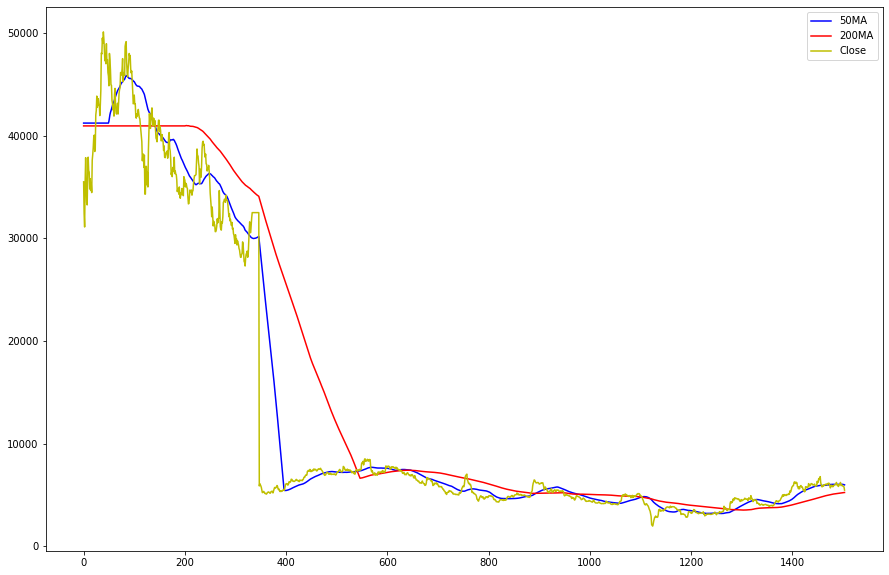

In [121]:
plt.figure(figsize=(15,10))
plt.plot(result['50_MA'],'b-',label='50MA')
plt.plot(result['200_MA'],'r-',label='200MA')
plt.plot(result['TDD_CLSPRC'],'y-',label='Close')
plt.legend()
plt.show()

In [122]:
#골든크로스 함수
def death_golden_cross(df):
  first_cross = 0 
  for i in range(0, len(result)):
    if df['50_MA'][i] < df['200_MA'][i] and first_cross == 0:
      print('Death cross on day', df['TRD_DD'][i], ':expect the price to continue to fall')
      first_cross=1
    elif df['50_MA'][i] > df['200_MA'][i] and first_cross ==1:
      print('Golden cross on day', df['TRD_DD'][i], ':expect the price to continue to rise')
      first_cross=0

In [123]:
death_golden_cross(result)

Death cross on day 2016/03/22 :expect the price to continue to fall
Golden cross on day 2017/11/06 :expect the price to continue to rise
Death cross on day 2018/04/11 :expect the price to continue to fall
Golden cross on day 2019/04/17 :expect the price to continue to rise
Death cross on day 2019/08/19 :expect the price to continue to fall
Golden cross on day 2020/02/20 :expect the price to continue to rise
Death cross on day 2020/03/16 :expect the price to continue to fall
Golden cross on day 2020/11/17 :expect the price to continue to rise


In [ ]:
#코드 맨 앞 주석 떼었다 붙였다 하면서 해머와 행잉맨 비교해보자.
result[(result['Hammer'] != 0) & (result['HangingMan'] == 0)] #해머인 것만 표시. 해머일 때 주식 매수하기 매우 좋은 타이밍. 해머일 떄 100으로 출력
#result[(result['HangingMan'] != 0) & (result['Hammer'] == 0)] #행잉맨인 것만 표시. 행잉맨일 때는 주식 매도하자. 행잉맨 일 때 -100으로 출력

,TRD_DD,ISU_CD,ISU_NM,TDD_CLSPRC,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,MKTCAP,EPS,PER,BPS,PBR,DPS,DVD_YLD,50_MA,200_MA,RSI,ROC,Stochastic,Stochastic_MA,Hammer,HangingMan,DCC
43,2015/10/26,095570,AJ네트웍스,47400.0,48000.0,48000.0,45500.0,4.438754e+11,"2,732",17.35,23715.0,2.00,0,0.00,41220.0,40945.000,61.099580,10.232558,24.890317,39.328675,100,0,0
50,2015/11/04,095570,AJ네트웍스,44850.0,45800.0,45800.0,42000.0,4.199960e+11,"2,732",16.42,23715.0,1.89,0,0.00,41407.0,40945.000,48.644587,-9.210526,14.077295,20.345813,100,0,0
57,2015/11/13,095570,AJ네트웍스,43100.0,43450.0,43700.0,41950.0,4.036082e+11,"2,732",15.78,23715.0,1.82,0,0.00,42986.0,40945.000,42.312201,-9.071730,19.021987,29.506551,100,0,0
87,2015/12/28,095570,AJ네트웍스,45700.0,46700.0,46700.0,44350.0,4.279558e+11,"2,732",16.73,23715.0,1.93,0,0.00,45715.0,40945.000,49.179770,-3.789474,31.007541,53.812647,100,0,0
140,2016/03/18,095570,AJ네트웍스,41000.0,41650.0,41650.0,40250.0,3.839428e+11,"2,732",15.01,23715.0,1.73,0,0.00,41087.0,40945.000,52.176945,-2.728351,45.652978,46.416652,100,0,0
174,2016/05/10,095570,AJ네트웍스,36450.0,37000.0,37000.0,35850.0,3.413345e+11,"2,391",15.24,28067.0,1.30,0,0.00,39575.0,40945.000,36.693472,-5.078125,9.187614,17.575792,100,0,0
284,2016/10/19,095570,AJ네트웍스,33700.0,33800.0,33800.0,33100.0,3.155823e+11,"2,391",14.09,28067.0,1.20,0,0.00,33977.0,37519.500,54.443707,6.984127,42.595628,42.759057,100,0,0
359,2017/02/06,095570,AJ네트웍스,5140.0,5180.0,5180.0,5080.0,2.406666e+11,478,10.75,5613.0,0.92,0,0.00,23939.4,31842.100,7.243019,-14.333333,18.408084,23.562076,100,0,0
373,2017/02/24,095570,AJ네트웍스,5340.0,5370.0,5380.0,5290.0,2.500311e+11,478,11.17,5613.0,0.95,0,0.00,17458.2,29526.050,12.213602,2.298851,77.579365,71.585213,100,0,0
544,2017/11/09,095570,AJ네트웍스,7380.0,7420.0,7420.0,7280.0,3.455485e+11,288,25.63,5980.0,1.23,60,0.81,7323.2,6880.250,52.555672,4.237288,62.356322,66.547842,100,0,0


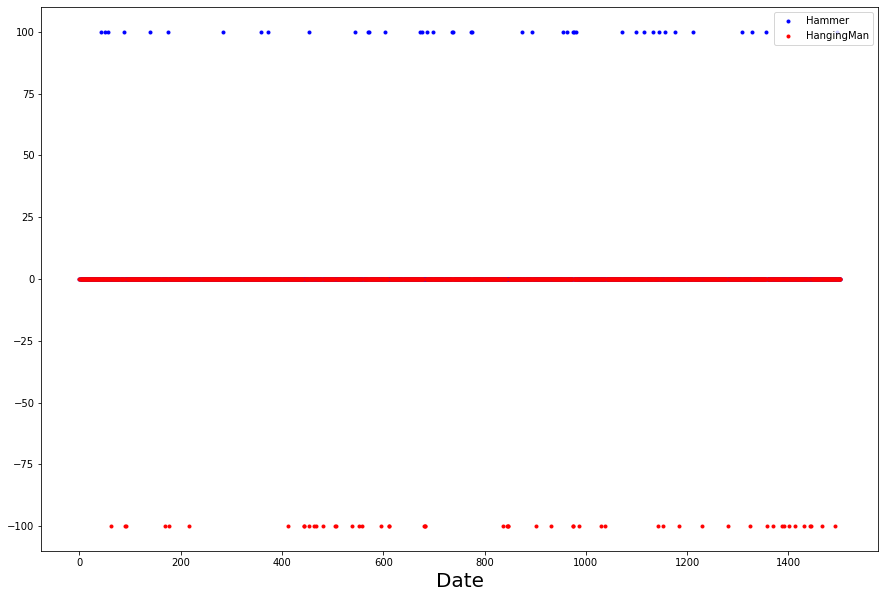

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(result['Hammer'],'b.',label='Hammer')
plt.plot(result['HangingMan'],'r.',label='HangingMan')
plt.xlabel('Date',fontsize=20)
plt.legend()
plt.show()

In [124]:
#Moving Average Envelope 함수
def MAP(df,use_time):
  UL = []
  ML = []
  LL = []
  MovingAverage = talib.MA(df['TDD_CLSPRC'],timeperiod=use_time)
  MovingAverage = MovingAverage.fillna(method='bfill')
  for i in MovingAverage:
    uls = i + (.07 * i)
    lls = i - (.07 * i)
    mls = i
    UL.append(uls)
    ML.append(mls)
    LL.append(lls)
  return UL, ML, LL

In [125]:
ul,ml,ll = MAP(result,50)

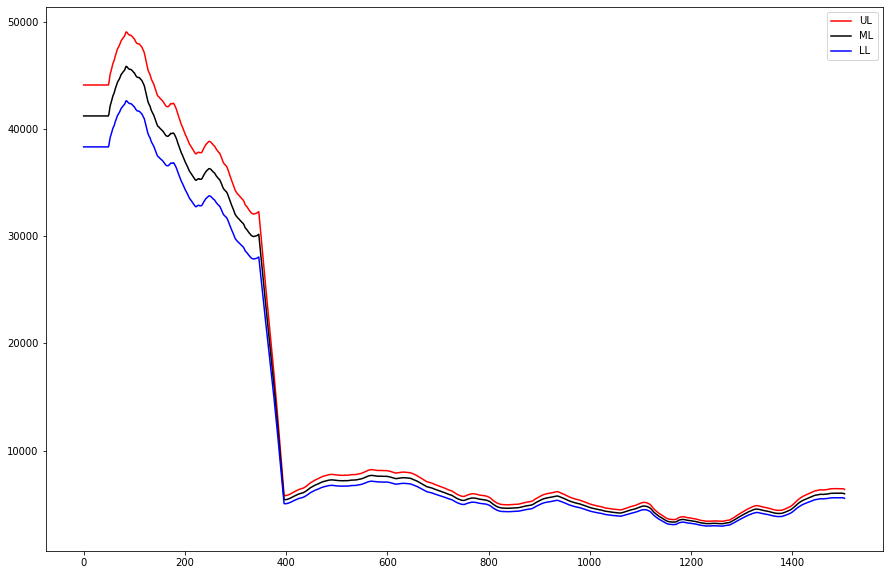

In [126]:
plt.figure(figsize=(15,10))
plt.plot(ul,'r',label='UL')
plt.plot(ml,'k',label='ML')
plt.plot(ll,'b',label='LL')
plt.legend()
plt.show()

여기까지 작업완성본.

밑부터는 임시로 막 작성하는 코드

보통 ARIMA/SARIMA 알고리즘을 사용할때 사용하는 방법론

In [98]:
result['TRD_DD'] = pd.to_datetime(result['TRD_DD'])

In [99]:
result['TRD_DD']

0      2015-08-21
1      2015-08-24
2      2015-08-25
3      2015-08-26
4      2015-08-27
          ...    
1499   2021-09-28
1500   2021-09-29
1501   2021-09-30
1502   2021-10-01
1503   2021-10-05
Name: TRD_DD, Length: 1504, dtype: datetime64[ns]

In [100]:
result.set_index('TRD_DD',drop=True,inplace=True)
result

,ISU_CD,ISU_NM,TDD_CLSPRC,TDD_OPNPRC,TDD_HGPRC,TDD_LWPRC,MKTCAP,EPS,PER,BPS,PBR,DPS,DVD_YLD,50_MA,200_MA,RSI,ROC,Stochastic,Stochastic_MA,Hammer,HangingMan,DCC
TRD_DD,,,,,,,,,,,,,,,,,,,,,,
2015-08-21,095570,AJ네트웍스,35500.0,30900.0,36500.0,28000.0,3.324383e+11,"2,732",12.99,23715.0,1.50,0,0.00,41220.0,40945.000,48.343080,3.098592,32.778995,39.581632,0,0,0
2015-08-24,095570,AJ네트웍스,32400.0,33500.0,34700.0,31200.0,3.034085e+11,"2,732",11.86,23715.0,1.37,0,0.00,41220.0,40945.000,48.343080,3.098592,32.778995,39.581632,0,0,0
2015-08-25,095570,AJ네트웍스,31100.0,33050.0,33650.0,30950.0,2.912347e+11,"2,732",11.38,23715.0,1.31,0,0.00,41220.0,40945.000,48.343080,3.098592,32.778995,39.581632,0,0,0
2015-08-26,095570,AJ네트웍스,35450.0,31300.0,38800.0,31300.0,3.319701e+11,"2,732",12.98,23715.0,1.49,0,0.00,41220.0,40945.000,48.343080,3.098592,32.778995,39.581632,0,0,0
2015-08-27,095570,AJ네트웍스,37850.0,36200.0,40300.0,34800.0,3.544448e+11,"2,732",13.85,23715.0,1.60,0,0.00,41220.0,40945.000,48.343080,3.098592,32.778995,39.581632,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-28,095570,AJ네트웍스,5900.0,5890.0,5990.0,5880.0,2.762515e+11,-,-,6089.0,0.97,210,3.56,6035.6,5217.600,46.633744,-0.337838,26.495726,34.472934,0,0,0
2021-09-29,095570,AJ네트웍스,5850.0,5720.0,5900.0,5720.0,2.739104e+11,-,-,6089.0,0.96,210,3.59,6028.6,5224.775,44.834218,-1.845638,29.636752,28.112536,0,0,0
2021-09-30,095570,AJ네트웍스,5840.0,5850.0,5890.0,5810.0,2.734422e+11,-,-,6089.0,0.96,210,3.60,6020.4,5231.575,44.464656,0.171527,31.631054,29.254511,0,0,0


In [103]:
result = result.asfreq('D',method='ffill')
result.sort_index(inplace=True)

In [ ]:
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


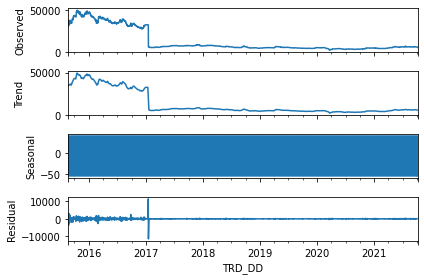

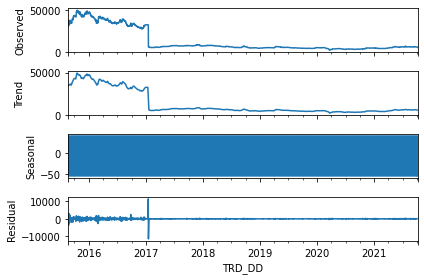

In [ ]:
sm.tsa.seasonal_decompose(result['TDD_CLSPRC'],model='addictive').plot()